In [1]:
import pandas as pd
import ast
import pandas_profiling
import matplotlib.pyplot as plt
from datetime import datetime
import importbib

In [2]:
# Achsleistung-2019-11-14T14-24-47.csv einlesen und aufbereiten

df2 = pd.read_csv("Achsleistung-2019-11-14T14-24-47.csv", sep=';')
df2.head()

,Timestamp,X1,Y1,Z1,C1,A1,SPI1,WZM,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,"2019-11-14T14:24:47,176",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"2019-11-14T14:24:47,188",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"2019-11-14T14:24:47,189",79.921,93.876,3450.010,1211.505,1186.133,1682.152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"2019-11-14T14:24:47,190",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"2019-11-14T14:24:47,192",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df3 = importbib.importMessprotokoll("MEAS_PROTOCOL_CSV_6.CSV")
df3.head()

,Unnamed: 0,Date,Time,Program,Workpiece no.,Testpoint,Plane,Probe no.,Cycle,S_MVAR,Measuring variant,Results:,Setpoint,Measured,Difference,Unit
0,1.0,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,15.000,14.999,-0.001,mm
1,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.996,-0.004,mm
2,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Diameter,12.014,12.019,0.005,mm
3,2.0,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,30.000,29.999,-0.001,mm
4,NaN,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.998,-0.002,mm


In [25]:
# test_data_set_1.csv einlesen und aufbereiten
# test_data_set_[2/xy/z].csv sind gleich aufgebaut und können mit dem gleichen Befehl eingelesen werden
df4 = importbib.importMessDatasetCSV("test_data_set_1.csv")
df4.head()

,Zeitstempel,NC-Programm,Werkzeug,MPC Lager [mG],MPC Spitze [%],MPC Veff Gesamt [mm/s],Axialkraft Druck [kN],Axialkraft Zug [kN],Biegemoment Werkzeug [Nm]
0,2019.11.14 14:20:00.086,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
1,2019.11.14 14:20:00.548,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
2,2019.11.14 14:20:01.456,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
3,2019.11.14 14:20:02.080,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
4,2019.11.14 14:20:06.011,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.4,2


In [3]:
# valuesncprogram.json einlesen und aufbereiten
df5 = importbib.importJSONExport("values_mdb-export.json")

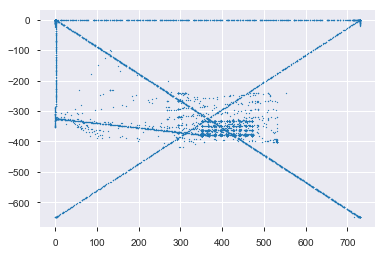

In [9]:
joined = importbib.joinByBinnedTimestampXY(df5, 2)

toPlotX = joined.loc[:, ["X", "timeStamp"]]
toPlotY = joined.loc[:, ["Y", "timeStamp"]]
plt.scatter(toPlotX["X"], toPlotY["Y"], s=1.0)
plt.show()

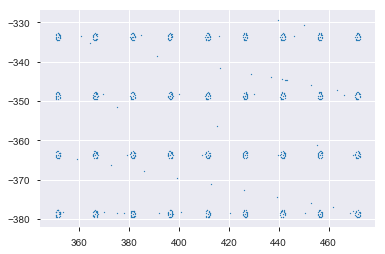

In [10]:
skip=4400#4800 # skip n rows
cut = 5500
toPlotX = joined[skip:cut].loc[lambda x: (340 <= x["X"]) & (x["X"] <= 480) & (x["Y"] >= -400) & (x["Y"] <= -320) & ((x["timeStamp"]>1.57345*10**12+8200000)&(x["timeStamp"]<1.573458*10**12+500000)), "X"]
toPlotY = joined[skip:cut].loc[lambda x: (340 <= x["X"]) & (x["X"] <= 480) & (x["Y"] >= -400) & (x["Y"] <= -320) & ((x["timeStamp"]>1.57345*10**12+8200000)&(x["timeStamp"]<1.573458*10**12+500000)), "Y"]
plt.scatter(toPlotX, toPlotY, s=1.0)
plt.show()

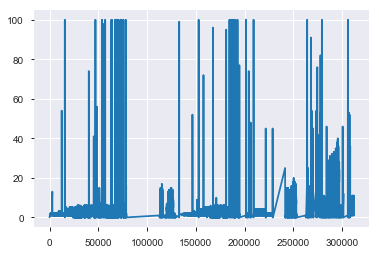

In [11]:
#Vorgehensweise:
# timestamp max und timestamp min ermitteln
# für verschiedene werte prüfen, ob sich 36 werte in dem zeitbereich ergeben
# diesen wert für die gruppierugn eines lochs verwenden
# x+y für diese loch plotten
# wiederholen, bis ok ^^
power = df5.loc[lambda x: x["ValueID"] == "12430012063.Main_Spindle.Actual_Power",:]
plt.plot(power["value"])
plt.show()

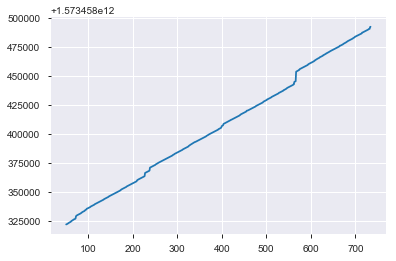

In [12]:
skipN = 4300
cutN = 5300
toPlotTimestamps = joined[skipN:cutN].loc[lambda x: (340 <= x["X"]) & (x["X"] <= 480) & (x["Y"] >= -400) & (x["Y"] <= -320), :]
toPlotTimestamps.reset_index(inplace=True)
toPlotTimestamps = toPlotTimestamps.loc[lambda x: (x["timeStamp"]>1.57345*10**12+8200000)&(x["timeStamp"]<1.573458*10**12+500000), "timeStamp"]
plt.plot(toPlotTimestamps)
plt.show()

In [15]:
minTS = toPlotTimestamps.min()
maxTS = toPlotTimestamps.max()
print("min: "+str(minTS))
print("max: "+str(maxTS))
print("Timeframe: "+str(maxTS-minTS))

min: 1573458321800
max: 1573458492400
Timeframe: 170600


c:\program files\python36\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


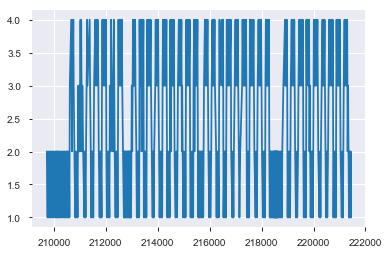

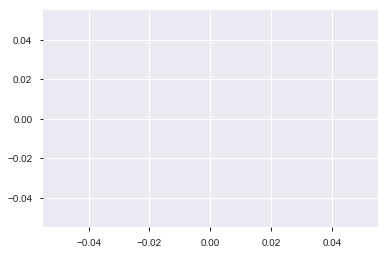

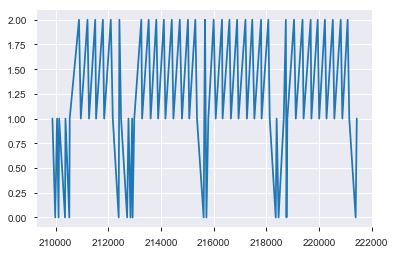

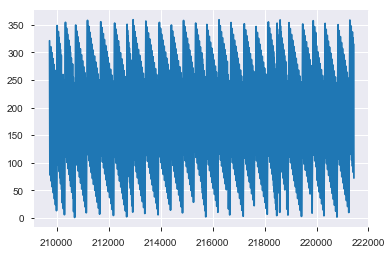

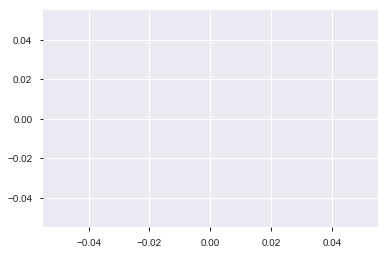

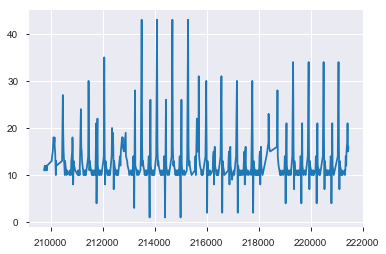

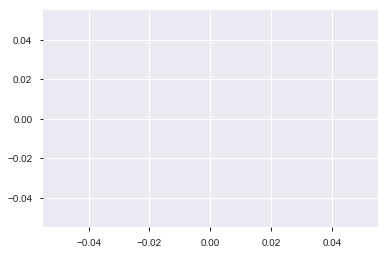

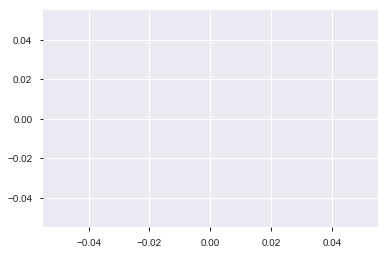

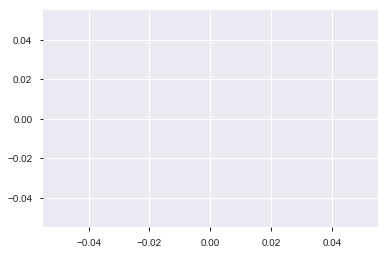

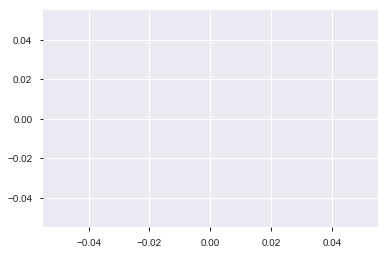

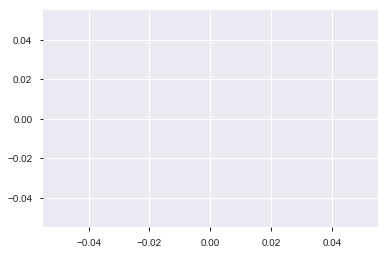

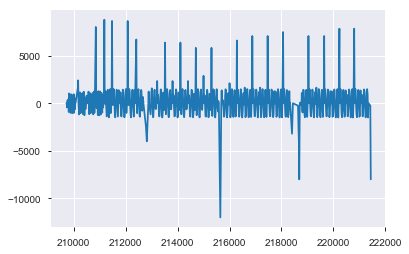

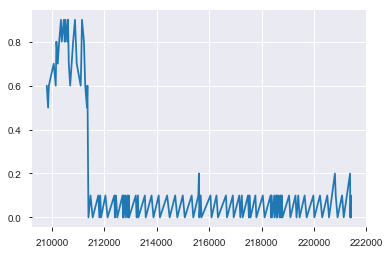

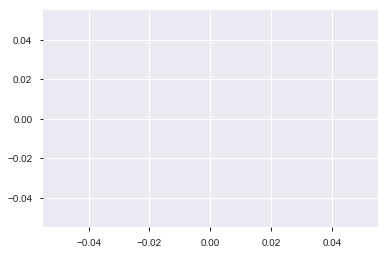

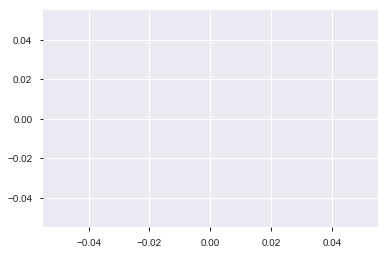

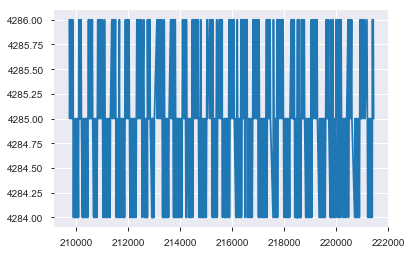

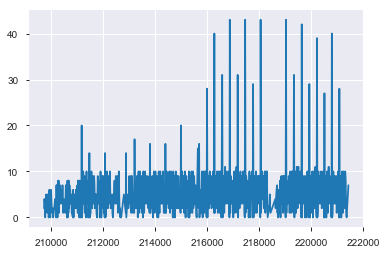

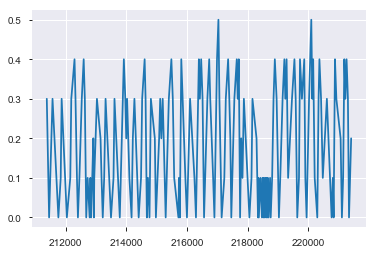

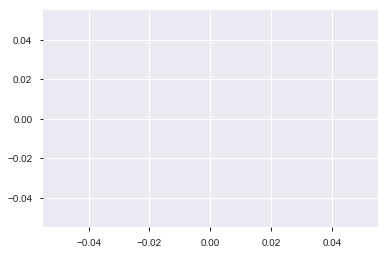

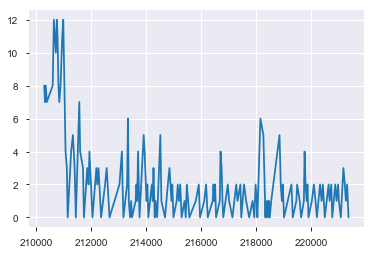

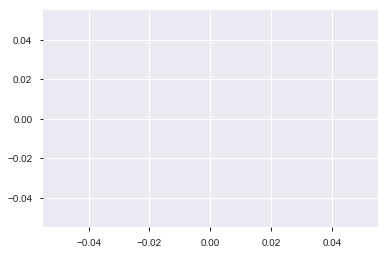

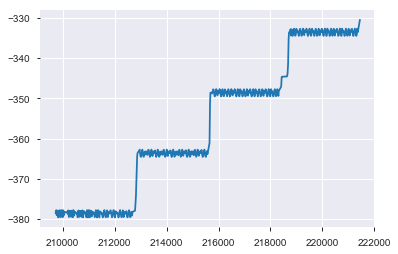

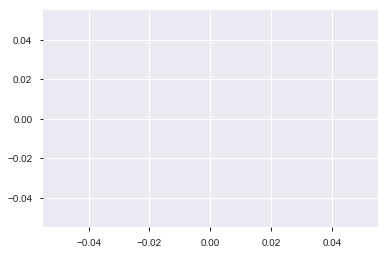

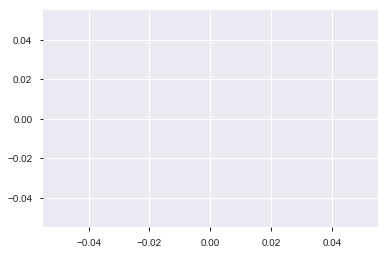

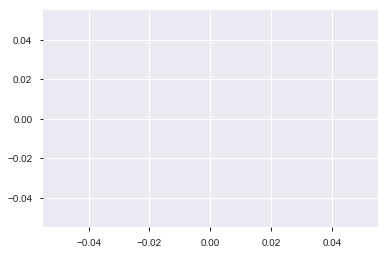

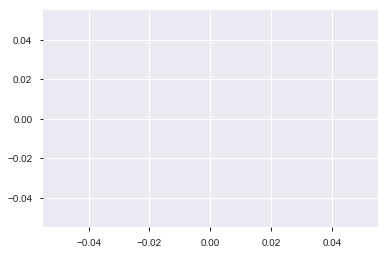

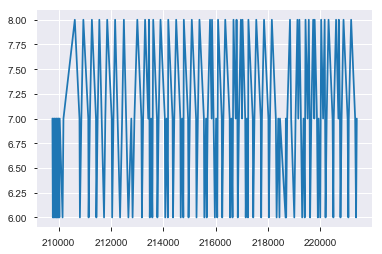

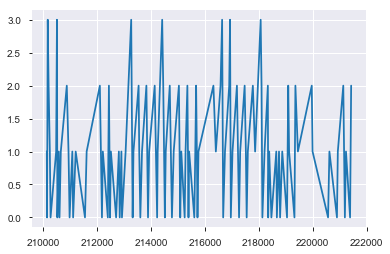

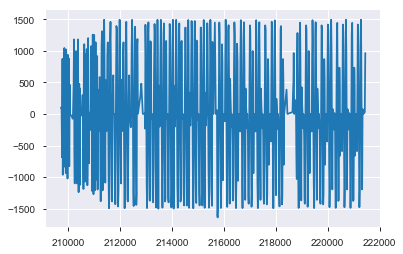

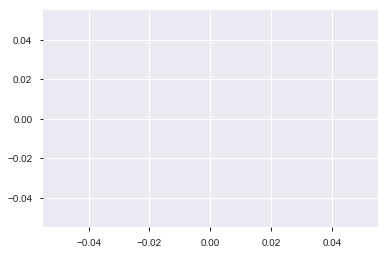

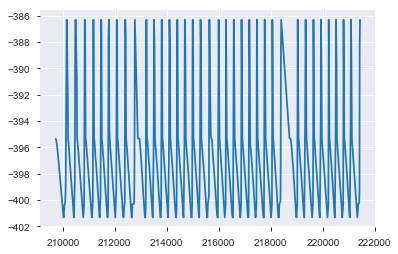

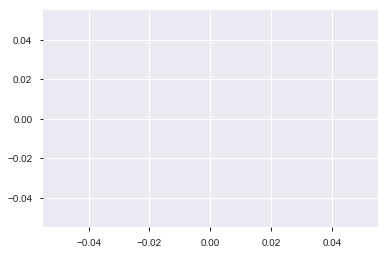

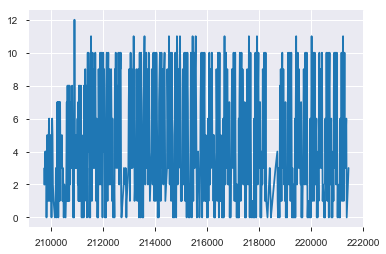

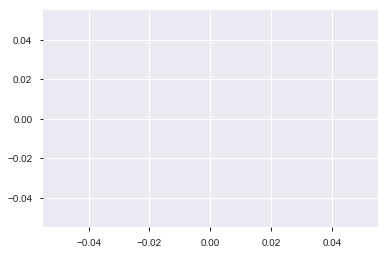

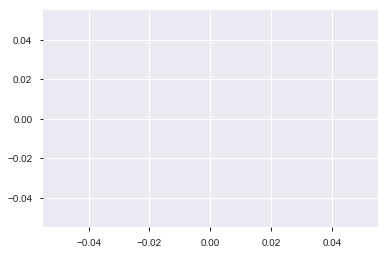

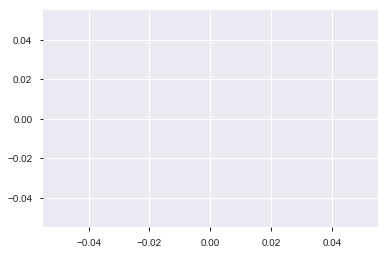

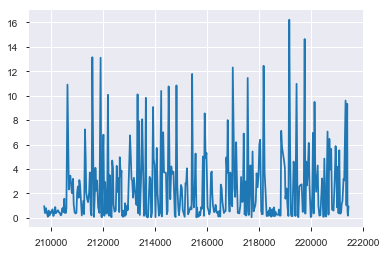

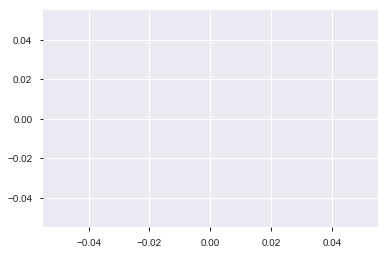

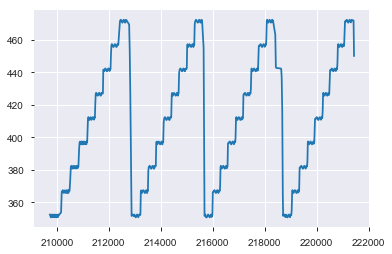

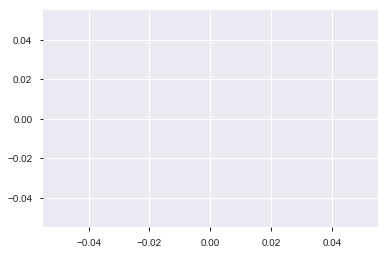

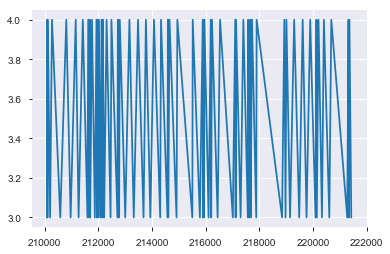

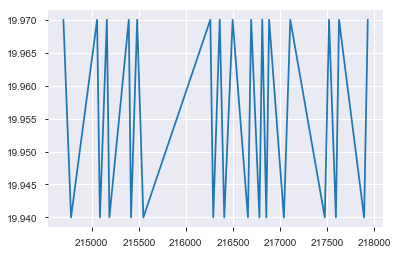

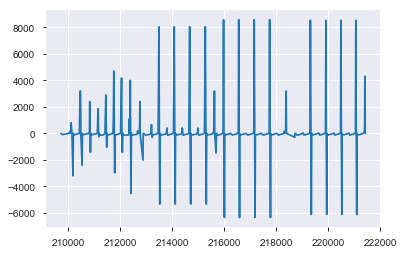

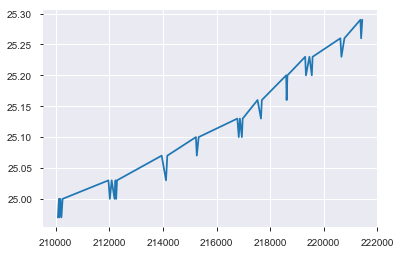

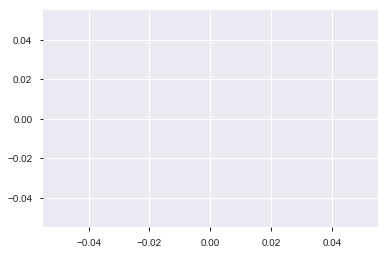

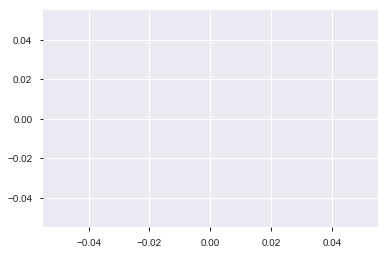

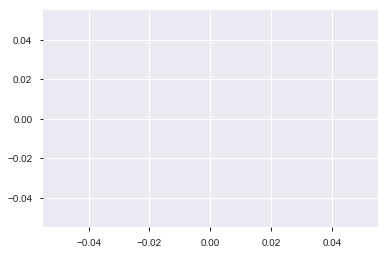

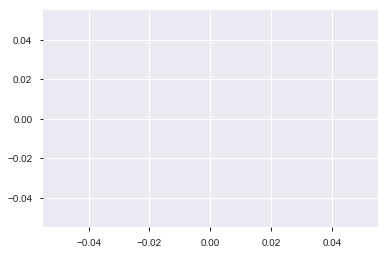

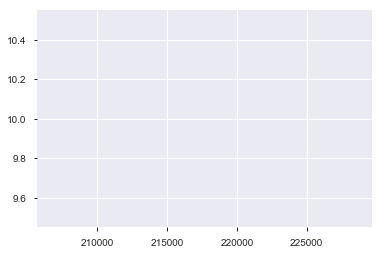

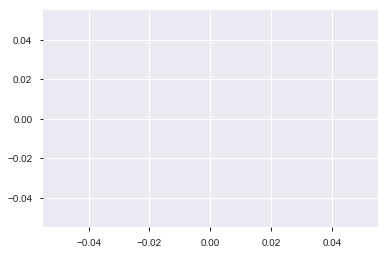

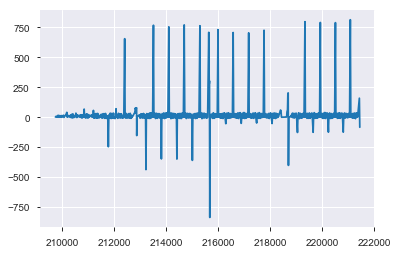

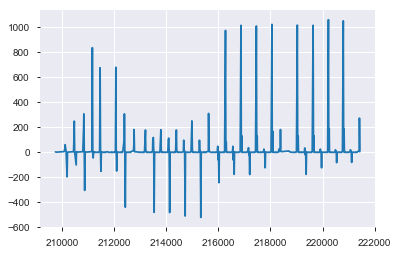

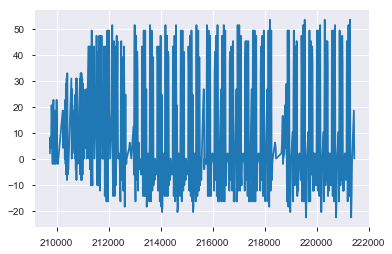

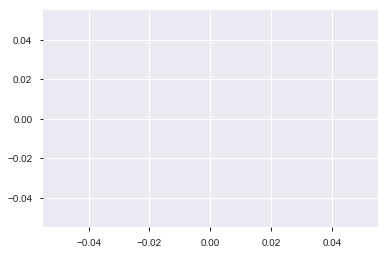

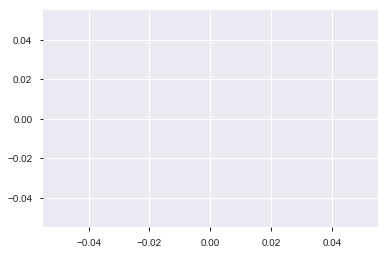

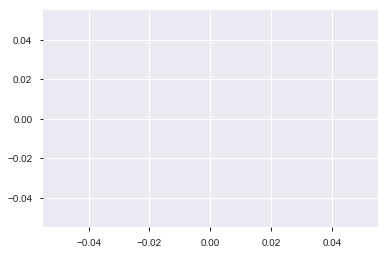

In [14]:
allData = df5.loc[lambda x: (minTS <= x["timeStamp"]) & (x["timeStamp"] <= maxTS), :]
choosenType = "12430012063.Main_Spindle.Actual_Power"#"12430012063.Tool_Control_Center.Axial_Force_Tension"#"12430012063.Tool_Control_Center.Bending_Moment"

dfAllTypes = importbib.importJSONExport("2019-11-25_values_actual.json")["ValueID"]

for tp in dfAllTypes:
    fig = plt.figure()
    plt.plot(allData.loc[lambda x: x["ValueID"] == tp, "value"])
    fig.savefig(tp+".png")
    

In [16]:
allX1 = allData.loc[lambda x: x["ValueID"]=="12430012063.X1_Axis.Actual_Position_MCS", "value"]
print("min: "+str(allX1.min()))
print("max: "+str(allX1.max()))
print("Frame: "+str(allX1.max()-allX1.min()))

min: 350.67
max: 472.49
Frame: 121.82


Daraus lässt sich ableiten: wir suchen nach einem zeitraum von ~170600, indem der X1-Wert nicht mehr als ~122 variiert, aber auch nicht sehr viel weniger.